In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
df = pd.read_csv("matala2_cosmetics_2019-Nov.csv")

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#Q1
df['event_time'] = pd.to_datetime(df['event_time'])
df=df.sort_values(['event_time'])
df['next_event_time']=df.groupby(["user_session"])["event_time"].shift(-1)
df['duration_to_next_event'] = (df['next_event_time'] - df['event_time']).dt.total_seconds()
df['duration_to_next_event'] = df['duration_to_next_event'].fillna(0)

In [11]:
#Q2
df['event_time'] = pd.to_datetime(df['event_time'])
df=df.sort_values(['event_time'])
df['next_date_time']=df.groupby(["user_id"])["event_time"].shift(1)
df['duration_to_next_date'] = ( df['event_time']-df['next_date_time']).dt.days
df['duration_to_next_date'] = df['duration_to_next_date'].fillna(0)
data=df[df.loc[:,"duration_to_next_date"]==5]
data["funnel_number"]=data.groupby(["user_id"])[["event_time"]].rank(method="first", ascending=True)+1
df=df.merge(data, how='left', on=list(df.columns))
df["funnel_number"]=df.groupby("user_id")["funnel_number"].fillna(method='ffill')
df["funnel_number"]= df["funnel_number"].fillna(1)
df["funnel_number"]=df["funnel_number"].astype(int)

C:\Users\User\AppData\Local\Temp/ipykernel_1724/780281439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["funnel_number"]=data.groupby(["user_id"])[["event_time"]].rank(method="first", ascending=True)+1


In [13]:
#Q3
df=df.sort_values(by=['user_id','user_session',"event_time"])
df['shifted_session'] = df['user_session'].shift()
df['same_session'] = np.where(df['shifted_session']==df['user_session'],0,1)
df['index_in_funnel'] = df.groupby(['user_id',"funnel_number"])['same_session'].cumsum()
df[df.loc[:,"product_id"]==1458813]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event,next_date_time,duration_to_next_date,funnel_number,shifted_session,same_session,index_in_funnel


In [14]:
#Q4
def float_price(num):
    try:
        input_price = float(num)
    except ValueError:
        try:
            x=(re.findall(r'\d+\.\d+', num)[0])
            input_price=float(x)
        except ValueError:
            input_price=np.NaN
    return input_price
df['price'] = df['price'].apply(float_price)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event,next_date_time,duration_to_next_date,funnel_number,shifted_session,same_session,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaT,0.0,NaT,0.0,1,NaN,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26,52.0,NaT,0.0,1,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1
697646,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,124.0,2019-11-06 10:40:34,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,0.0,2019-11-06 10:41:26,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,NaT,0.0,2019-11-06 10:43:30,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1


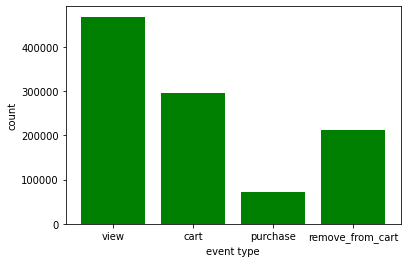

In [15]:
#Q5
typs_event=df["event_type"].unique()
typs_event
t1=len(df[df.loc[:,"event_type"]==typs_event[0]])
t2=len(df[df.loc[:,"event_type"]==typs_event[1]])
t3=len(df[df.loc[:,"event_type"]==typs_event[2]])
t4=len(df[df.loc[:,"event_type"]==typs_event[3]])
x = typs_event
y = [t1,t2,t3,t4]

plt.bar(x,y,align='center',color="green") # A bar chart
plt.xlabel('event type')
plt.ylabel('count')
plt.show()


In [16]:
typs_event

array(['view', 'cart', 'purchase', 'remove_from_cart'], dtype=object)

In [19]:
#Q6
session_data=df.groupby(["user_session","user_id","funnel_number","index_in_funnel"]).count().reset_index()
session_data=session_data.loc[:,["user_session","user_id","funnel_number","index_in_funnel","event_time"]]
session_data.rename(columns = {"event_time":"count_visit"}, inplace = True)
time_of_visit=df.groupby(["user_session","funnel_number","index_in_funnel"])[["duration_to_next_event"]].sum().reset_index()
session_data=session_data.merge(time_of_visit, how='left', on=["user_session","funnel_number","index_in_funnel"])
session_data.rename(columns = {"duration_to_next_event":"time_of_visit_in_minuts"}, inplace = True)
session_data["time_of_visit_in_minuts"]=session_data["time_of_visit_in_minuts"]/60
view=df[df.loc[:,"event_type"]=="view"]
list_of_viewed=view.groupby(["user_session","user_id","funnel_number","index_in_funnel"])["product_id"].apply(list).reset_index(name='list_of_viewed')
session_data=session_data.merge(list_of_viewed, how='left', on=["user_id","user_session","funnel_number","index_in_funnel"])
cart=df[df.loc[:,"event_type"]=="cart"]
list_of_added_to_cart=cart.groupby(["user_session","user_id","funnel_number","index_in_funnel"])["product_id"].apply(list).reset_index(name='list_of_added_to_cart')
session_data=session_data.merge(list_of_added_to_cart, how='left', on=["user_id","user_session","funnel_number","index_in_funnel"])
purchase=df[df.loc[:,"event_type"]=="purchase"]
list_of_purchased=purchase.groupby(["user_session","user_id","funnel_number","index_in_funnel"])["product_id"].apply(list).reset_index(name='list_of_purchased')
session_data=session_data.merge(list_of_purchased, how='left', on=["user_id","user_session","funnel_number","index_in_funnel"])
session_data=session_data.set_index('user_session')

,user_id,funnel_number,index_in_funnel,count_visit,time_of_visit_in_minuts,list_of_viewed,list_of_added_to_cart,list_of_purchased
user_session,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.000000,[5829298],NaN,NaN
00005ac0-5c22-4756-bb12-31b90af75fa3,473600495,1,1,2,0.183333,"[5846437, 5846436]",NaN,NaN
0000d358-49a1-4a54-b402-08205c35981c,557616099,1,1,1,0.000000,[5887753],NaN,NaN
0000d72e-be5f-4a03-9f17-6ac81584f177,463202709,1,1,12,40.533333,"[59996, 5739492, 5739493, 5739493, 5739493, 57...","[5739493, 5569528, 5813882]",NaN
00013b79-0ac9-4944-bec6-1e787179717a,565510934,1,1,1,0.000000,[5597836],NaN,NaN
